<h3>Datasets<h3>

<h5>Problem Statement<h5>
    
 Increasing the footprint of risk insurance in Africa and reduce insurance fraud.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import sklearn.metrics
import re

import warnings
warnings.filterwarnings('ignore')

C:\Users\josph\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<h3>Load Data<h3>

In [2]:
df = pd.read_excel('../datasets/insurance_claims_raw_1.xlsx')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


<h3>Data Preprocessing<h3>

In [3]:
df.shape

(1000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          998 non-null    float64       
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            998 non-null    float64       
 7   policy_annual_premium        997 non-null    float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      999 non-null   

In [5]:
df.isnull().sum()

months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            93
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df.drop(columns= ['_c39'] ,inplace = True)

In [7]:
def fill_nan(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        elif df[col].dtype in ['float64','int64']:
            df[col] == df[col].fillna(df[col].mean())
    return df

In [8]:
df = fill_nan(df)

In [9]:
df.isnull().sum()

months_as_customer             0
age                            2
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              2
policy_annual_premium          3
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  2
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
df = df.replace('?',0) 

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [13]:
df.shape                                           

(985, 39)

<h3>Exploratory Data Analysis<h3>

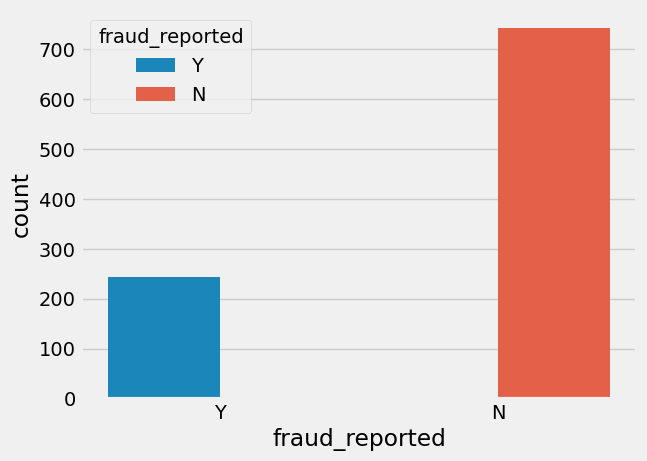

In [30]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

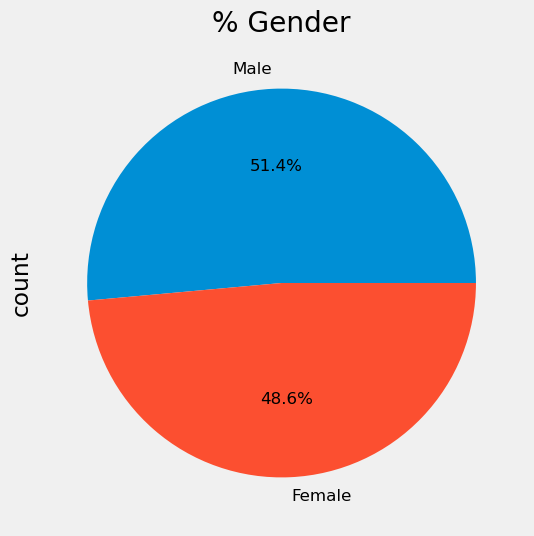

In [31]:
#Graph to show insurance frauds by gender
frauds_data = df[df['fraud_reported'] =='Y']

#Grouping the data by insured sex
#fraud_counts = frauds_data['insured_sex'].value_counts()

#Create a Pie Chart
fig = plt.figure(figsize=(10,6))
ax = (frauds_data['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)
ax.set_title('% Gender')
plt.show()

In general Males are involved in fraud cases more than Females

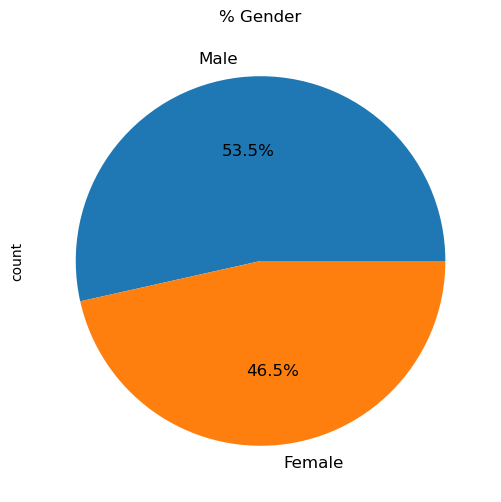

In [14]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)
ax.set_title('% Gender')
plt.show()

Here we see from the pie chart is that the most insured sex is Male than Female.

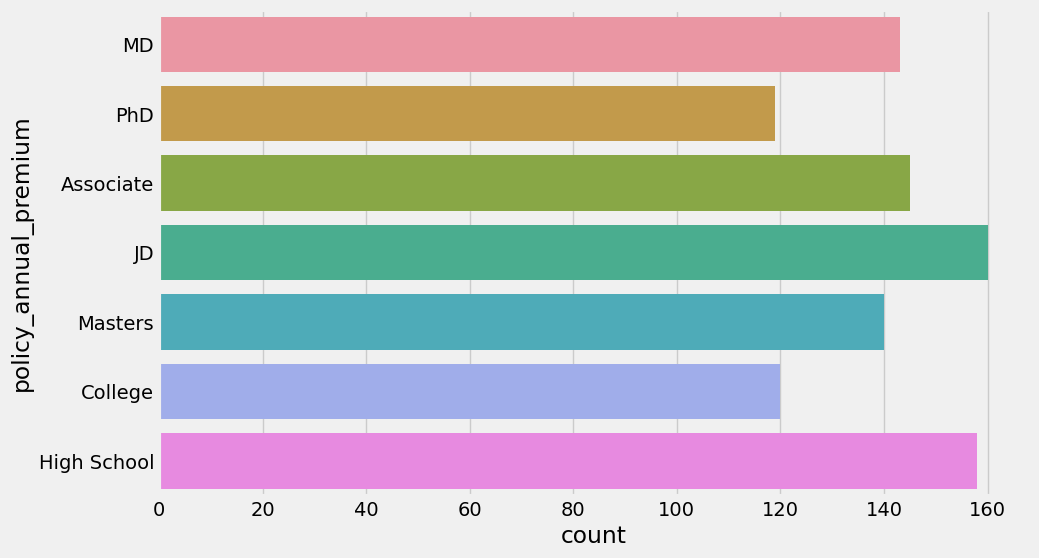

In [34]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

JD and High School Education categories form the highest propotion of the insured.

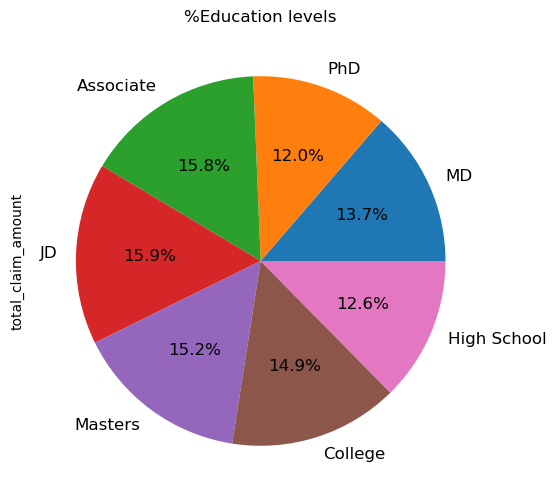

In [15]:
education_groups = df.groupby('insured_education_level')

fig = plt.figure(figsize=(10,6))
ax = (education_groups['total_claim_amount'].sum()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['MD', 'PhD', 'Associate', 'JD', 'Masters', 'College','High School'],
         fontsize=12)
ax.set_title('%Education levels')
plt.show()


Most claims are  coming from JD Education category. This could be because most insured are coming from this education category

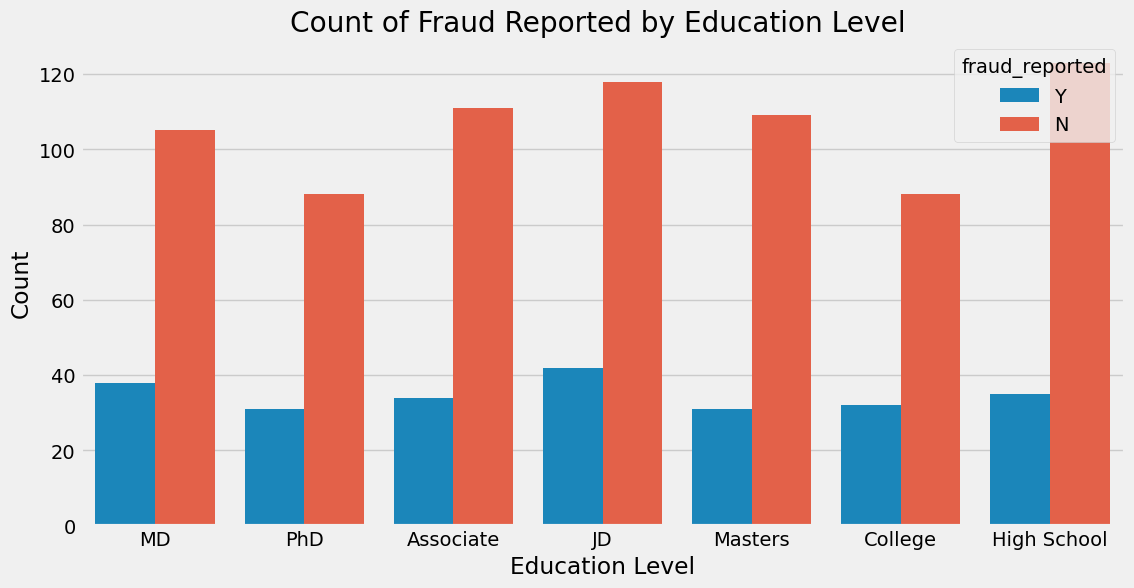

In [36]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x = 'insured_education_level', hue = 'fraud_reported', data=df)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Fraud Reported by Education Level ')
plt.show()

The highest fraud cases are coming from JD education category. An investigation as to why insured from JD ecucation category are attracted needs to be conducted.This is because from the same education category high claims and high fraud cases arise. 

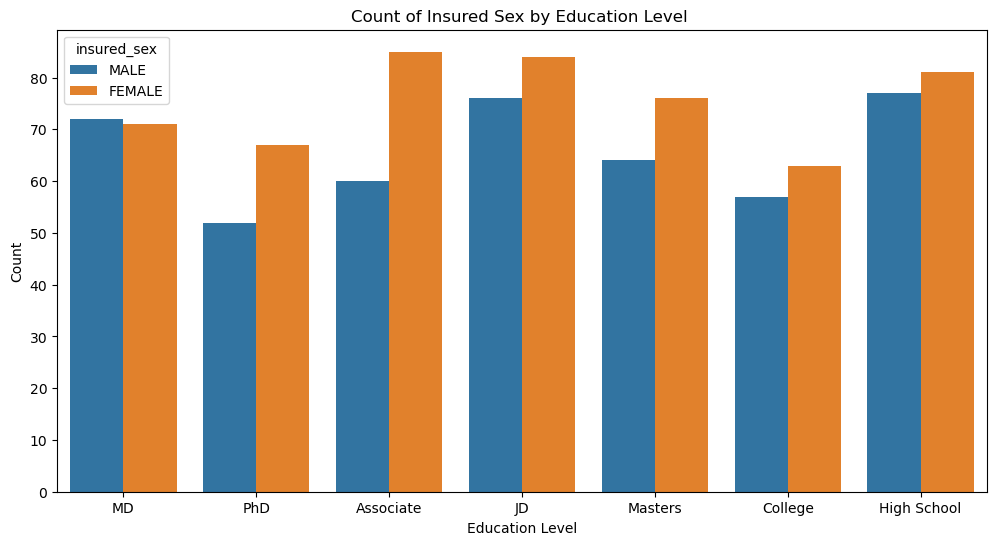

In [16]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x = 'insured_education_level', hue = 'insured_sex', data=df)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Insured Sex by Education Level ')
plt.show()

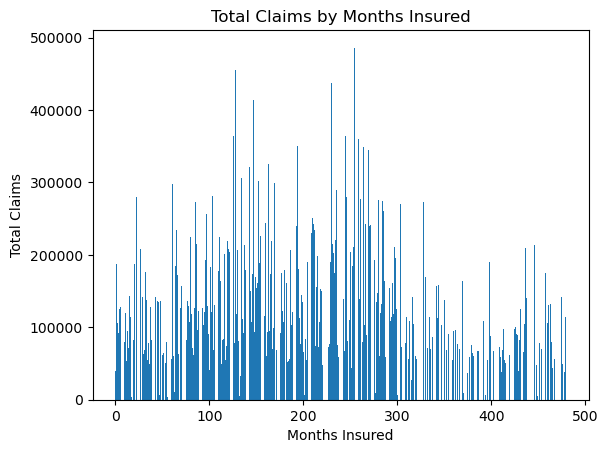

In [17]:
cmi = df.groupby('months_as_customer')
total_claims = cmi['total_claim_amount'].sum()

plt.bar(total_claims.index , total_claims.values)
plt.xlabel('Months Insured')
plt.ylabel('Total Claims')
plt.title('Total Claims by Months Insured')
plt.show()

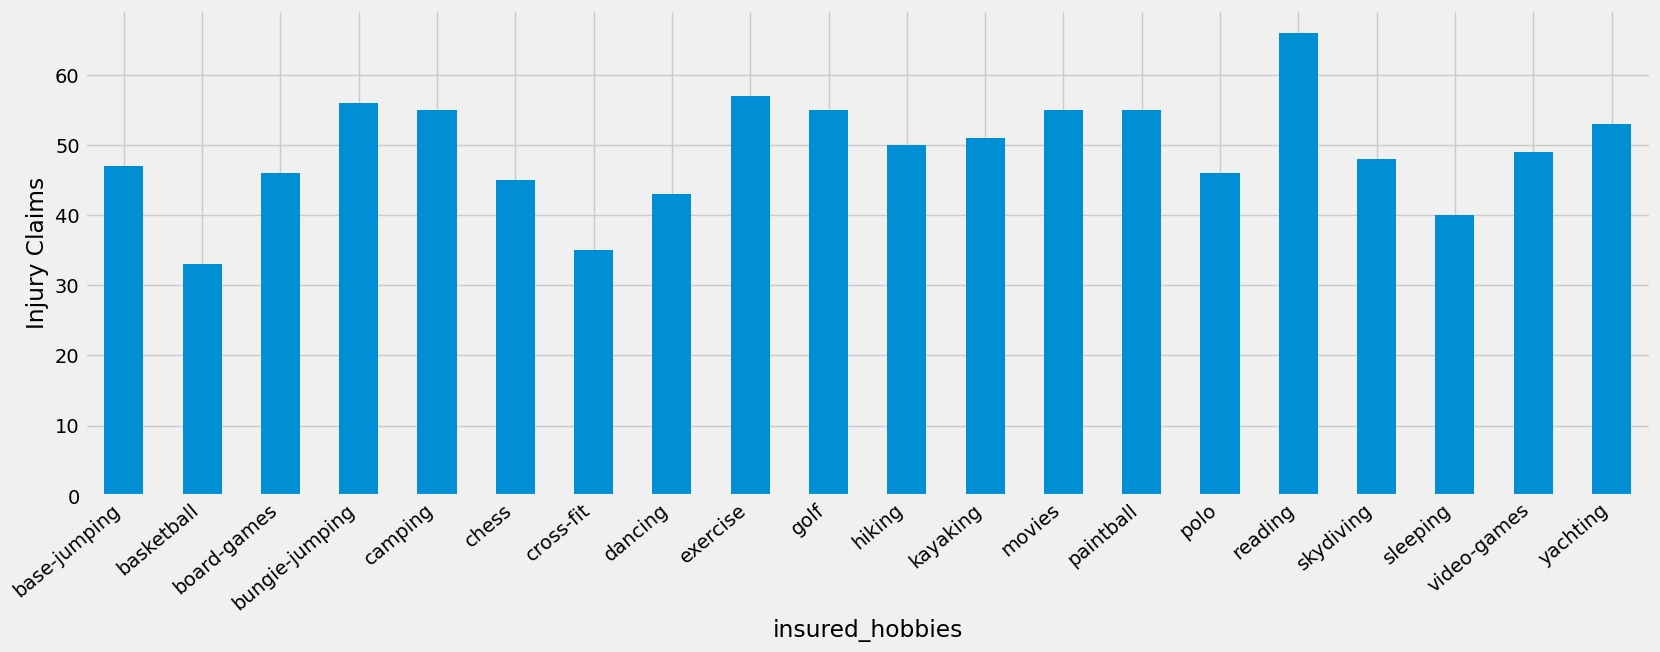

In [18]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax= df.groupby('insured_hobbies').injury_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Injury Claims')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


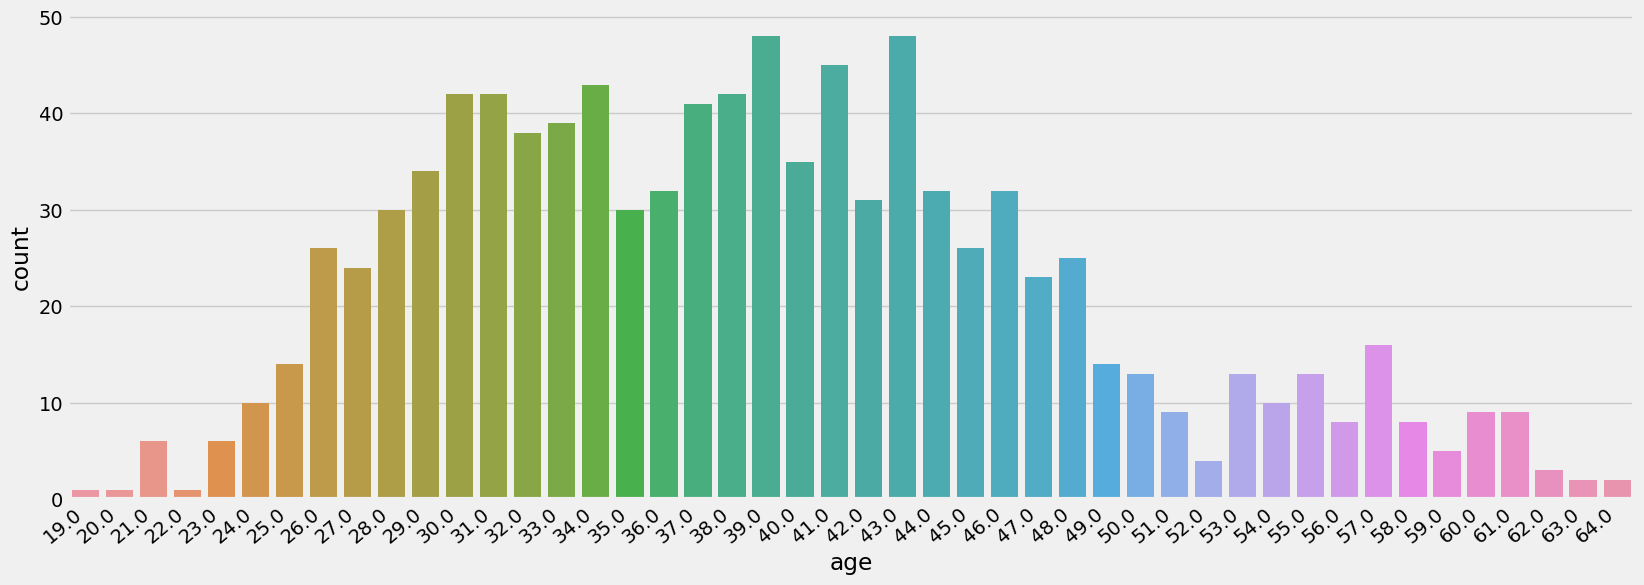

In [19]:
fig = plt.figure(figsize=(18,6))
ax = sns.countplot(x='age', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

We see on the Age Bar Graph that the most insured people are between 30 and 43.This is the age category to target when selling insurance.

In [20]:
df["insured_occupation"].value_counts()


insured_occupation
machine-op-inspct    91
prof-specialty       83
tech-support         78
craft-repair         73
exec-managerial      73
sales                72
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      62
handlers-cleaners    53
farming-fishing      52
Name: count, dtype: int64

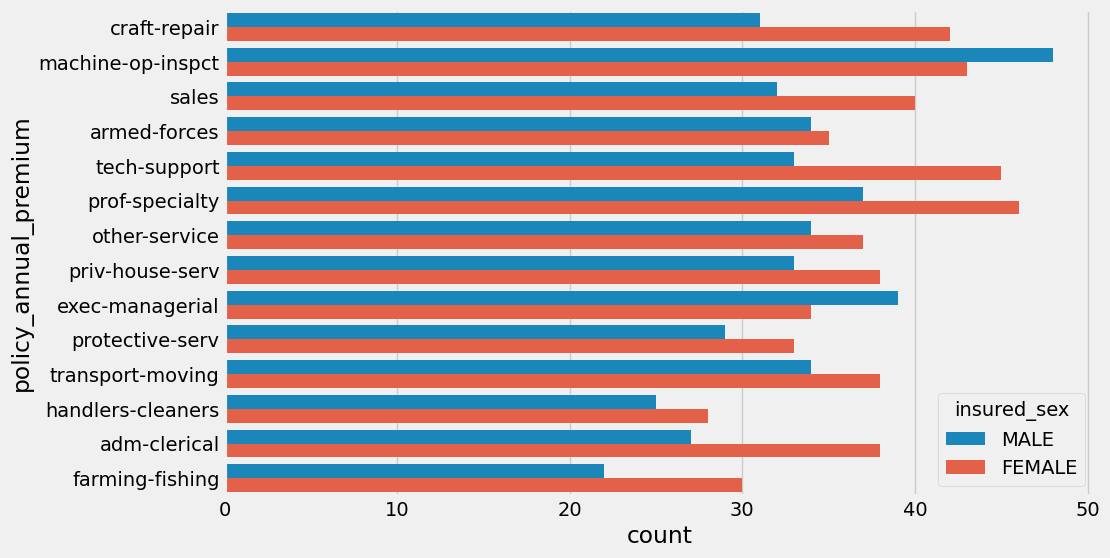

In [21]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_occupation' ,hue = 'insured_sex', data=df)
ax.set_ylabel('policy_annual_premium')
plt.show()

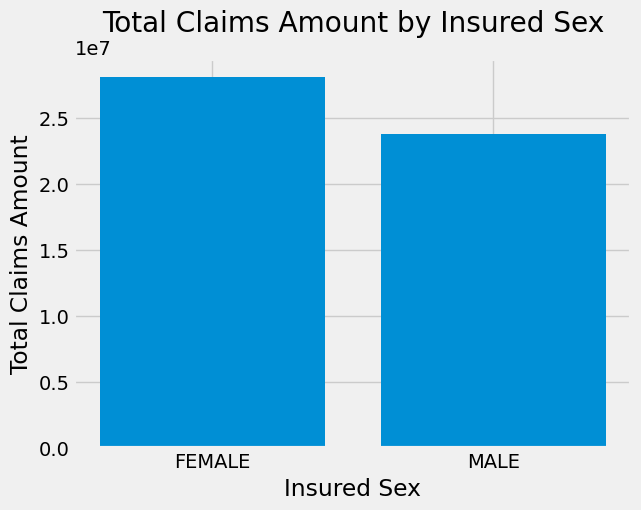

In [22]:
claims_by_sex = df.groupby('insured_sex')['total_claim_amount'].sum().reset_index()

plt.bar(claims_by_sex['insured_sex'], claims_by_sex['total_claim_amount'])
plt.xlabel('Insured Sex')
plt.ylabel('Total Claims Amount')
plt.title('Total Claims Amount by Insured Sex')
plt.show()

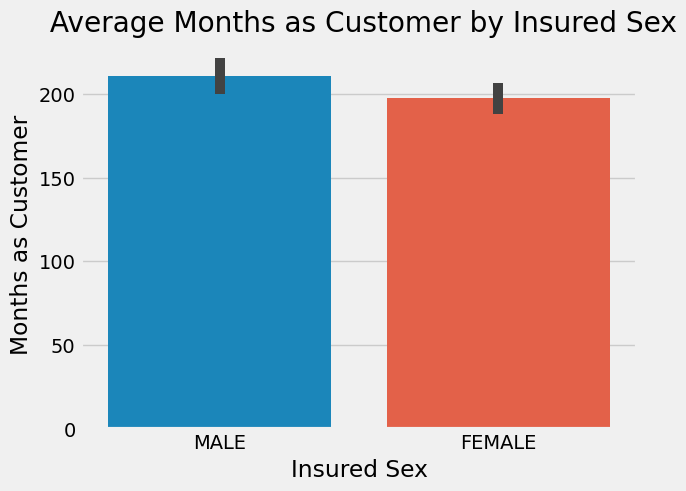

In [23]:
#Trying to see which gender in average has been insured for long
sns.barplot(x ='insured_sex',y ='months_as_customer', data = df)
plt.xlabel('Insured Sex')
plt.ylabel('Months as Customer')
plt.title(' Average Months as Customer by Insured Sex')
plt.show()